In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar matplotlib para mostrar gráficos inline en el notebook
%matplotlib inline

# Cargar los datos
df = pd.read_csv('./data/titanic.csv')
print(f"El shape del conjunto de entrenamiento es {df.shape}. {df.shape[0]} filas y {df.shape[1]} columnas.")
df.info()


El shape del conjunto de entrenamiento es (891, 12). 891 filas y 12 columnas.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Muestra aleatoria de 3 filas
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,NaN,S
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,NaN,S
67,68,0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,NaN,S


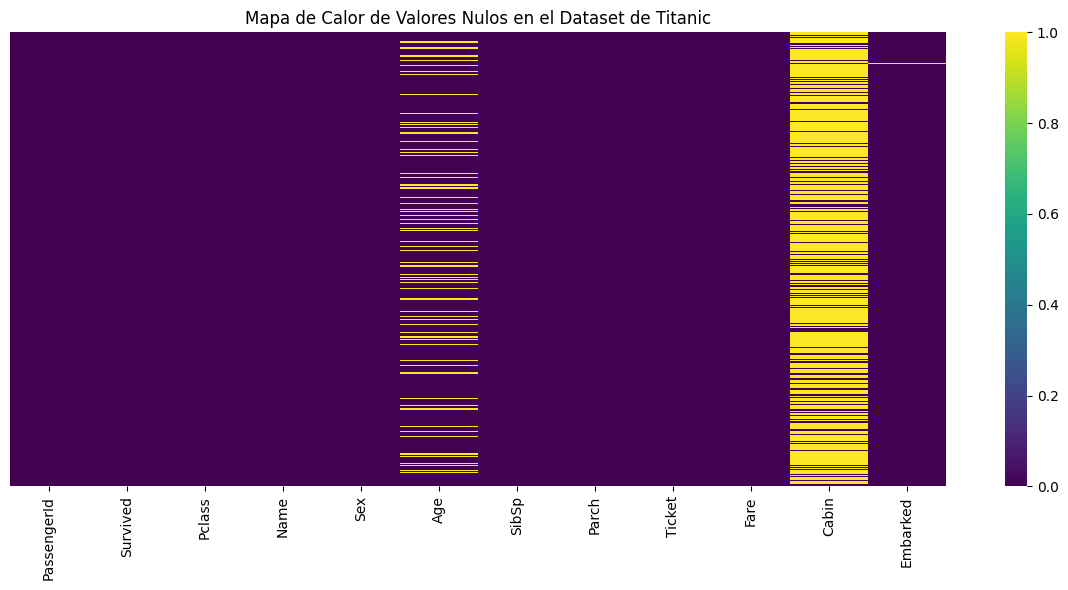

In [ ]:
# Crear un mapa de calor que muestre los valores nulos del dataframe
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos en el Dataset de Titanic')
plt.tight_layout()
plt.show()


In [ ]:
# Calcular el porcentaje de valores faltantes por columna
missing_values_percentage = df.isnull().mean() * 100
missing_values_percentage = missing_values_percentage.round(2).sort_values(ascending=False)
print(missing_values_percentage)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Name            0.00
Pclass          0.00
Survived        0.00
Sex             0.00
Parch           0.00
SibSp           0.00
Fare            0.00
Ticket          0.00
dtype: float64


C:\Users\braul\AppData\Local\Temp\ipykernel_19392\2109022008.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values_count.values, y=missing_values_count.index, palette='viridis')


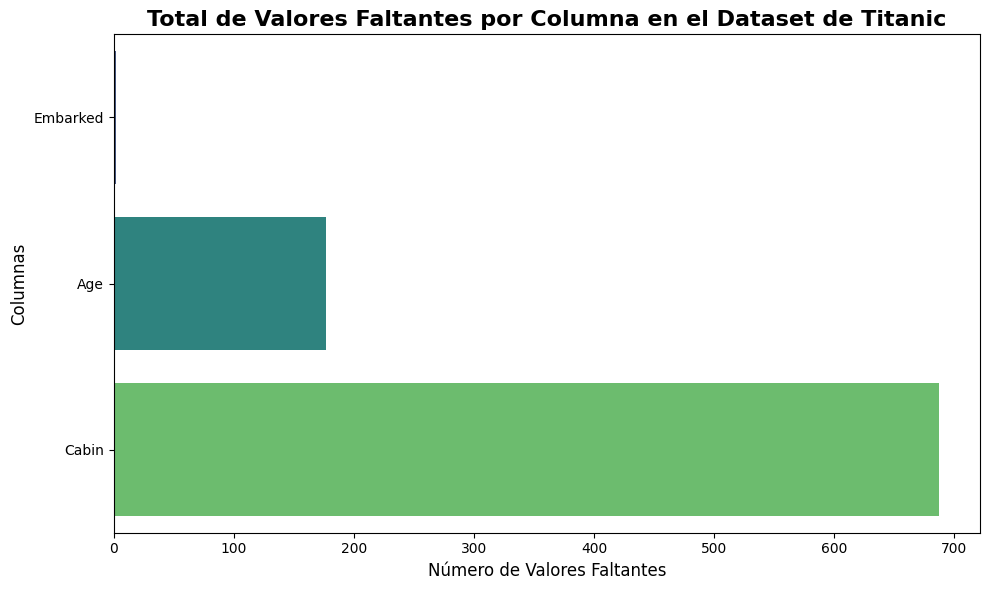

In [ ]:
# Crear gráfico de barras que muestre el total de valores faltantes por columna
plt.figure(figsize=(10, 6))
missing_values_count = df.isnull().sum()
missing_values_count = missing_values_count[missing_values_count > 0].sort_values(ascending=True)
sns.barplot(x=missing_values_count.values, y=missing_values_count.index, palette='viridis')
plt.title('Total de Valores Faltantes por Columna en el Dataset de Titanic', fontsize=16, fontweight='bold')
plt.xlabel('Número de Valores Faltantes', fontsize=12)
plt.ylabel('Columnas', fontsize=12)
plt.tight_layout()
plt.show()



In [ ]:
# Eliminar la columna Cabin ya que tiene demasiados valores faltantes (77.10%)
df.drop('Cabin', axis=1, inplace=True)
print(f"El shape del conjunto de datos después de eliminar Cabin es {df.shape}")
df.info()


In [ ]:
##Imputación de la columna Age usando la MEDIANA

# Calcular la mediana de la columna Age
median_age = df['Age'].median()

print(f'Mediana de Age: {median_age}')
print(f'Valores faltantes en Age antes: {df["Age"].isnull().sum()}')

# Imputar los valores nulos con la mediana
df['Age'].fillna(median_age, inplace=True)

print(f'Valores faltantes en Age después: {df["Age"].isnull().sum()}')
print(f'\nEstadísticas de Age después de la imputación:')
print(df['Age'].describe())


In [ ]:
##Imputación de la columna Embarked usando la MODA

# Mostrar la moda antes de imputar
mode_embarked = df['Embarked'].mode()[0]

print(f'Moda de Embarked: {mode_embarked}')
print(f'Valores faltantes en Embarked antes: {df["Embarked"].isnull().sum()}')

# Imputar los valores nulos con la moda
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print(f'Valores faltantes en Embarked después: {df["Embarked"].isnull().sum()}')
print(f'\nDistribución de Embarked después de la imputación:')
print(df['Embarked'].value_counts())

# Verificar valores faltantes después de toda la imputación
print('Valores faltantes después de TODA la imputación:')
print(df.isnull().sum())
print(f'\nTamaño del dataset: {df.shape[0]} filas y {df.shape[1]} columnas')

In [ ]:
#Eliminación de Columnas No Predictivas
# Información antes de eliminar columnas
print('Columnas antes de eliminar:')
print(df.columns.tolist())
print(f'\nShape antes de limpiar df: {df.shape[0]} filas y {df.shape[1]} columnas.')

In [ ]:
# Eliminar columnas no predictivas
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)

print('Columnas después de eliminar:')
print(df.columns.tolist())
print(f'\nDespués de limpiar df: {df.shape[0]} filas y {df.shape[1]} columnas.')

In [ ]:
# Mostrar el dataset limpio
print('Dataset después de la limpieza:')
print(df.head())
print('\nInformación del dataset limpio:')
print(df.info())

In [ ]:
#Guardar Datos Limpios

Para no hacer nuestros notebooks demasiado 
grandes, haremos un checkpoint aquí. 
Guardamos el dataset en el directorio ./data/.

import os

# Crear directorio data si no existe
if not os.path.exists('./data'):
    os.makedirs('./data')
    print('Directorio ./data/ creado exitosamente.')
else:
    print('Directorio ./data/ ya existe.')


In [ ]:
# Guardar datos limpios
df.to_csv('./data/titanic_clean.csv', index=False)
print('Dataset limpio guardado como: ./data/titanic_clean.csv')
print(f'\nArchivo contiene: {df.shape[0]} filas y {df.shape[1]} columnas.')

In [ ]:
# Verificar que el archivo fue guardado correctamente
df_verificacion = pd.read_csv('./data/titanic_clean.csv')
print('Verificación - Primeras filas del archivo guardado:')
print(df_verificacion.head())
print(f'\nVerificación - Shape: {df_verificacion.shape}')